RMSE:  38327.48362688316
R2:  0.11346569282979346


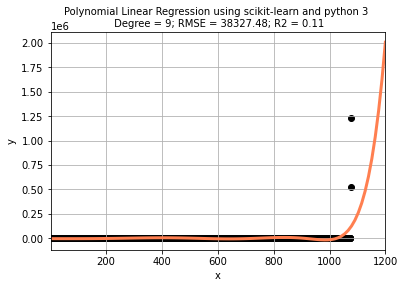

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("https://raw.githubusercontent.com/EdiTomas/IA2/master/confirmados_fecha.csv")


x = np.asarray(df['NO']).reshape(-1,1)
y = df['CFIS']
#print(x)
#print(y)
nb_degree = 9

polynomial_features = PolynomialFeatures(degree = nb_degree)
#print(X)
X_TRANSF = polynomial_features.fit_transform(x)

#----------------------------------------------------------------------------------------#
# Step 3: define and train a model

model = linear_model.LinearRegression()

model.fit(X_TRANSF, y)

#----------------------------------------------------------------------------------------#
# Step 4: calculate bias and variance

Y_NEW = model.predict(X_TRANSF)

rmse = np.sqrt(mean_squared_error(y,Y_NEW))
r2 = r2_score(y,Y_NEW)

print('RMSE: ', rmse)
print('R2: ', r2)


#----------------------------------------------------------------------------------------#
# Step 5: prediction

x_new_min = 1.0
x_new_max = 1200.0

X_NEW = np.linspace(x_new_min, x_new_max,100)
X_NEW = X_NEW[:,np.newaxis]

X_NEW_TRANSF = polynomial_features.fit_transform(X_NEW)


Y_NEW = model.predict(X_NEW_TRANSF)

#Y_NEW =Y_NEW+Y_NEW*np.sin(Y_NEW)

#print(Y_NEW)
plt.scatter(x, y,  color='black')
plt.plot(X_NEW, Y_NEW, color='coral', linewidth=3)

plt.grid()
plt.xlim(x_new_min,x_new_max)
#plt.ylim(0,600000)

title = 'Degree = {}; RMSE = {}; R2 = {}'.format(nb_degree, round(rmse,2), round(r2,2))

plt.title("Polynomial Linear Regression using scikit-learn and python 3 \n " + title,
          fontsize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig("polynomial_linear_regression.png", bbox_inches='tight')
plt.show()



